In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [3]:
def initializeparams(inputFeatures, hiddenlayerneurons, outputFeatures):
    W1 = np.random.randn(hiddenlayerneurons, inputFeatures)
    W2 = np.random.randn(outputFeatures, hiddenlayerneurons)
    b1 = np.zeros((hiddenlayerneurons, 1))
    b2 = np.zeros((outputFeatures, 1))
    
    params = {"W1": W1, "b1": b1, "W2":W2, "b2": b2}
    return params 

In [4]:
def forwardPropogation(X, Y, p):
    Z1 = np.dot(p["W1"], X) + p["b1"]
    A1 = sigmoid(Z1)
    Z2 = np.dot(p["W2"], A1) + p["b2"]
    A2 = sigmoid(Z2)
    
    cache = (Z1, A1, p["W1"], p["b1"], Z2, A2, p["W2"], p["b2"])
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1-A2), (1-Y))
    cost = -np.sum(logprobs)/X.shape[1]
    return cost, cache, A2

In [5]:
def backwardPropogation(X, Y, cache):
    
    (Z1, A1, W1, b1, Z2, A2, W2, b2) = cache
    
    dZ2= A2 - Y
    dW2 = np.dot(dZ2, A1.T)/X.shape[1]
    db2 = np.sum(dZ2, axis=1, keepdims=True)
    dA1 = np.dot(W2.T, dZ2)
    dZ1= np.multiply(dA1, A1*(1-A1))
    dW1 = np.dot(dZ1, X.T)/X.shape[1]
    db1 = np.sum(dZ1, axis=1, keepdims = True)/X.shape[1]
    
    return {"dZ2": dZ2, "dW2": dW2, "db2": db2,
            "dZ1": dZ1, "dW1": dW1, "db1": db1}    

In [6]:
def updateparams(p, grad, lr):
    p["W1"] = p["W1"] - lr*grad["dW1"]
    p["W2"] = p["W2"] - lr*grad["dW2"]
    p["b1"] = p["b1"] - lr*grad["db1"]
    p["b2"] = p["b2"] - lr*grad["db2"]
    
    return p

0.6538344605074157
0.6524228519873244
0.6510407687675785
0.649687556269607
0.6483625745526174
0.6470651980159269
0.6457948151047894
0.6445508280198693
0.6433326524304845
0.6421397171917355
0.6409714640656174
0.6398273474462045
0.6387068340889747
0.6376094028443435
0.6365345443954527
0.6354817610002559
0.6344505662379372
0.6334404847596768
0.63245105204379
0.6314818141552339
0.6305323275094936
0.6296021586408338
0.6286908839749075
0.627798089605702
0.6269233710768013
0.6260663331669365
0.6252265896797924
0.6244037632380354
0.6235974850815245
0.6228073948696621
0.6220331404878399
0.6212743778579346
0.6205307707527989
0.6198019906147039
0.6190877163776696
0.6183876342936371
0.6177014377624217
0.6170288271653899
0.6163695097028017
0.6157231992347615
0.6150896161257121
0.6144684870924176
0.6138595450553697
0.6132625289935586
0.6126771838025467
0.6121032601557841
0.6115405143691034
0.6109887082683344
0.6104476090599786
0.6099169892048796
0.6093966262948333
0.6088863029320752
0.60838580661158

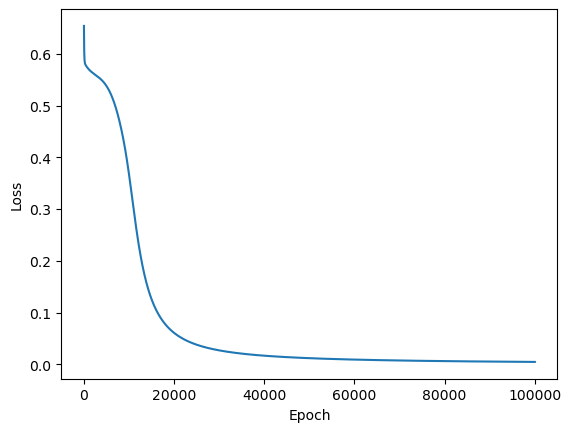

In [9]:
X = np.array([[0,0,1,1], [0,1,0,1]])
Y = np.array([[0,1,1,1]])

hiddenlayerneurons = 2
inputFeatures = X.shape[0]
outputFeatures = Y.shape[0]
params = initializeparams(inputFeatures, hiddenlayerneurons, outputFeatures)
epochs = 100000
lr = 0.01
losses = np.zeros((epochs, 1))

for i in range(epochs):
    losses[i, 0], cache, A2 = forwardPropogation(X,Y,params)
    print(losses[i,0])
    grads= backwardPropogation(X, Y, cache)
    params = updateparams(params, grads,lr)
    
plt.figure()
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [8]:
X = np.array([[0,1,1,0],[0,1,0,1]])
_, _, A2 = forwardPropogation(X,Y,params)
print((A2>0.5)*1)

[[0 1 1 1]]
